**Pattern Recognition Module Project Colab Notebook**

# Initialization

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


# Drive Initialization

In [0]:
# Linking the Drive to colab
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
#Insert the Drive Folder
import os
os.chdir("drive/deep")
!ls --full-time

total 217904
-rw-r--r-- 1 root root  56322144 2018-06-18 20:45:33.000000000 +0000 300kNegative_test.h5
-rw-r--r-- 1 root root 155765344 2018-06-18 20:47:49.000000000 +0000 300kNegative_train.h5
-rw-r--r-- 1 root root      5455 2018-06-18 21:42:53.000000000 +0000 clr.py
-rw-r--r-- 1 root root      5600 2018-06-18 21:44:12.000000000 +0000 clr.pyc
drwxr-xr-x 2 root root      4096 2018-06-18 21:26:02.000000000 +0000 drive
-rw-r--r-- 1 root root      4638 2018-06-18 23:51:26.000000000 +0000 kerasModel_traingular2_1_epoch12.json
-rw-r--r-- 1 root root      4638 2018-06-19 07:31:10.000000000 +0000 kerasModel_traingular2_1_epoch12_sk36.json
-rw-r--r-- 1 root root      4638 2018-06-18 22:27:49.000000000 +0000 kerasModel_traingular2_1.json
-rw-r--r-- 1 root root      4638 2018-06-19 00:11:09.000000000 +0000 kerasModel_traingular2_2_epoch12.json
-rw-r--r-- 1 root root      4638 2018-06-19 07:44:57.000000000 +0000 kerasModel_traingular2_2_epoch12_sk36.json
-rw-r--r-- 1 root root      4638 2018-06-

# Install Libraries

In [4]:
!pip install -q keras
!pip3 install torch torchvision
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import tensorflow as tf
!pip install -q scikit-plot
!pip install tflearn

    100% |████████████████████████████████| 484.0MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5bd60000 @  0x7fbf858241c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 4.7MB/s 
    100% |████████████████████████████████| 2.0MB 14.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 102kB 4.7MB/s 
  Running setup.py bdist_wheel for tflearn ... -

 \ done
  Stored in directory: /content/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


# Trianguar2 clr

## Train

In [14]:
###Initialixzing Training Values

import datetime

train_size  = 128000 ##skew=1/36
actual_num_pos_train = 3459
actual_num_neg_train = train_size - actual_num_pos_train


#initially, the rising edge covers the complete experiment
base_lr = 0.002   
max_lr = 0.03      
epochs = 12
epochs_per_step = 2
batch_size = 32
step_size = (int)(((train_size/batch_size))*epochs_per_step) 
print('confirmed at {}'.format(datetime.datetime.now().time()))

##Initializing weights and models name to save
model_name = "kerasModel_traingular2_3_epoch12_sk36.json"
weights_name = "modelWeights_traingular2_3_epoch12_sk36.h5"
normalizer_name = "normalizer_traingular2_3_epoch12_sk6.pkl"
save = False;#True and False to save the model ad weights

confirmed at 07:56:52.154597


version 7
step_size = 8000
epochs 12, base_lr 0.002, max_lr 0.03, batch_size 32
The positive patches for training are:  3459
The egative patches for training are:  304225
Epoch 1/12
Epoch 1/12
 - 45s - loss: 0.1352 - acc: 0.9715
Epoch 2/12
 - 46s - loss: 0.0386 - acc: 0.9881
Epoch 3/12
 - 46s - loss: 0.0176 - acc: 0.9948
Epoch 4/12
 - 46s - loss: 0.0141 - acc: 0.9959
Epoch 5/12
 - 47s - loss: 0.0134 - acc: 0.9962
Epoch 6/12
 - 47s - loss: 0.0133 - acc: 0.9961
Epoch 7/12
 - 47s - loss: 0.0129 - acc: 0.9962
Epoch 8/12
 - 46s - loss: 0.0116 - acc: 0.9967
Epoch 9/12
 - 47s - loss: 0.0111 - acc: 0.9967
Epoch 10/12
 - 47s - loss: 0.0115 - acc: 0.9967
Epoch 11/12
 - 47s - loss: 0.0114 - acc: 0.9966
Epoch 12/12
 - 47s - loss: 0.0108 - acc: 0.9969
AUC: 0.9977532207720348
model and weights have been saved


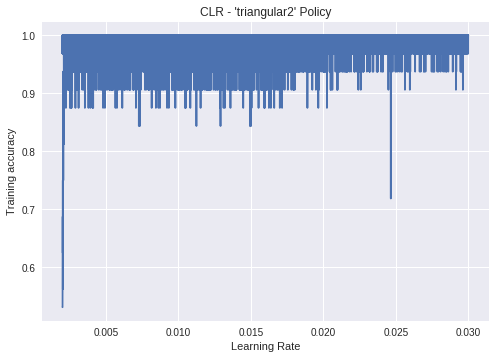

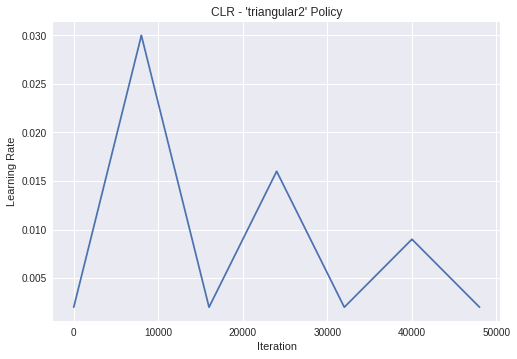

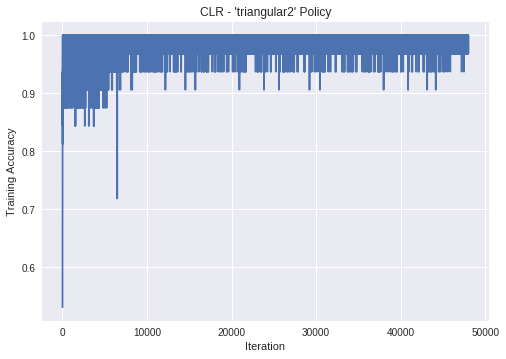

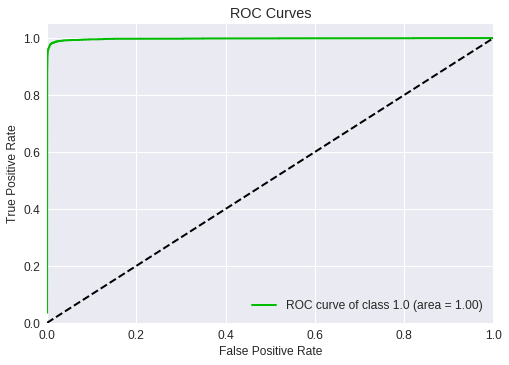

In [15]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from clr  import CyclicLR
### keras tools
from keras.models import model_from_json
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


## sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib

import scikitplot as skplt

import h5py
#################################################################################################################

# POSITIVE - TRAIN
print("version 7")


print("step_size = {}".format(step_size))
print('epochs {}, base_lr {}, max_lr {}, batch_size {}'.format(epochs, base_lr, max_lr, batch_size))
fpos = h5py.File('Positive_train.h5', 'r')
first_key=list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_train = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
train_pos=dposar.reshape([-1,size_image,size_image,1])

print("The positive patches for training are: ", num_pos_train)

# NEGATIVE - TRAIN
fneg = h5py.File('300kNegative_train.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_train = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
train_neg=dnegar.reshape([-1,size_image,size_image,1])

print("The egative patches for training are: ", num_neg_train)

   

# Create the target vectors
train_pos_lab = np.ones((actual_num_pos_train,1))
train_neg_lab = np.zeros((actual_num_neg_train,1))

#### Build the training set  (images and targets)
tpos = np.copy(train_pos[0:actual_num_pos_train,:,:,:])
tneg = np.copy(train_neg[0:actual_num_neg_train,:,:,:])

# Stack the subsets
X_Train = np.vstack((tpos,tneg))
Y_Train = np.vstack((train_pos_lab,train_neg_lab))

# Shuffle the two arrays in unison
X_Train, Y_Train = shuffle(X_Train,Y_Train)

#########augmentation + 
#######################Normalization

### do data augmentation at the end before predicting

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=0,
    vertical_flip=False)
datagen.fit(X_Train)

#################################
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv1', input_shape = X_Train.shape[1:]))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv1'))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(Flatten())

model.add(Dense(units = 256, activation='relu', name='fc1'))
model.add(Dropout(rate=0.5))

model.add(Dense(units = 256, activation='relu', name='fc2'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=2, activation='softmax', name='predictions'))


Y_one_hot = to_categorical(np.ravel(Y_Train),2)

##Cyclic Learing Rate

clr_triangular = CyclicLR(mode = 'triangular2',base_lr = base_lr, max_lr = max_lr, step_size = step_size)

gradientDescent=SGD()
model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

#### model.summary()
model.fit_generator(datagen.flow(x= X_Train, y =Y_one_hot,batch_size = batch_size),steps_per_epoch=len(X_Train) / batch_size,
                    callbacks=[clr_triangular], verbose=2, 
                    epochs=epochs, use_multiprocessing=True)

#####Plots of CLR###########################################################
plt.figure(1)
plt.ylabel('Training accuracy')
plt.xlabel('Learning Rate')
plt.title("CLR - 'triangular2' Policy")
plt.plot(clr_triangular.history['lr'],clr_triangular.history['acc'] )

plt.figure(2)

plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular2' Policy")
plt.plot(clr_triangular.history['iterations'],clr_triangular.history['lr'] )

plt.figure(3)

plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title("CLR - 'triangular2' Policy")
plt.plot(clr_triangular.history['iterations'],clr_triangular.history['acc'] )

#####################################################
#NORMALIATION###########################################

normalized_Xtrain = datagen.standardize(X_Train)

####################################################
####################################################
y_pred_keras = model.predict_proba(normalized_Xtrain, verbose=2, batch_size=batch_size)
fpr_keras, tpr_keras, _ = roc_curve(Y_Train, y_pred_keras[:,1])
train_auc = roc_auc_score(Y_Train, y_pred_keras[:,1])
print("AUC: {}".format(train_auc))

skplt.metrics.plot_roc(Y_Train, y_pred_keras, plot_micro=False, plot_macro=False, classes_to_plot=1)
# plt.figure()
# plt.plot(fpr_keras, tpr_keras)
# plt.title('roc curve')
# plt.show

# test = y_pred_keras[y_pred_keras[:,1]!=0, 1]
# test.__len__()

############################### #serialize model to JSON and weights to HDF5
if save == True:
    model_json = model.to_json()
    with open(model_name, 'w') as json_file:
        json_file.write(model_json)

    model.save_weights(weights_name)
    joblib.dump(datagen,normalizer_name)

    print("model and weights have been saved")

###############################


## Test

The positive patches for testing are:  1164
The negative patches for testing are:  110000
model loaded
111164/111164 [==============================] - 13s 118us/step
The Scored loss is 0.004248690775095605, accuracy0.9987226080385736
AUC: 0.996909442361762 PRECISION [0.99949985 0.92725753] RECALL [0.99920909 0.95274914] F1SCORE [0.99935445 0.93983051] SUPPORT [110000   1164]


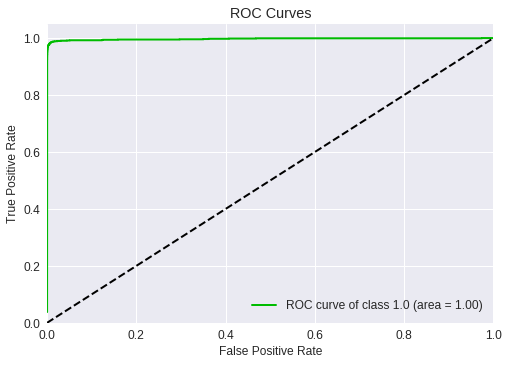

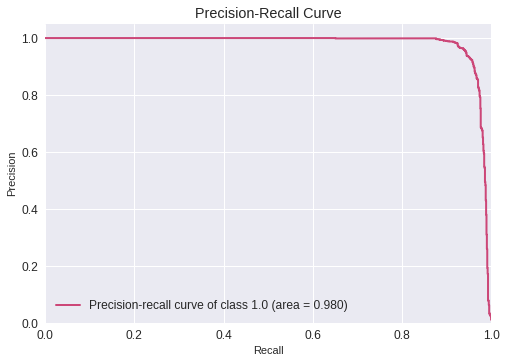

In [16]:
from __future__ import print_function

import numpy as np

from keras.models import model_from_json
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
#from sklearn.metrics import roc_auc_score

#from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import h5py


#################################################################################################################
# POSITIVE - Test
fpos = h5py.File('Positive_test.h5', 'r')
first_key = list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_test = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
test_pos=dposar.reshape([-1,size_image,size_image,1])

print("The positive patches for testing are: ", num_pos_test)

# NEGATIVE - Test
fneg = h5py.File('300kNegative_test.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_test = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
test_neg=dnegar.reshape([-1,size_image,size_image,1])

print("The negative patches for testing are: ", num_neg_test)

# the sum of positive and negative test set ~= 20% od training set size
actual_num_pos_test = 1164
actual_num_neg_test = 110000

# Create the target vectors
test_pos_lab = np.ones((actual_num_pos_test,1))
test_neg_lab = np.zeros((actual_num_neg_test,1))

#### Build the training set  (images and targets)
tpos = np.copy(test_pos[0:actual_num_pos_test,:,:,:])
tneg = np.copy(test_neg[0:actual_num_neg_test,:,:,:])

# Stack the subsets
X_Test = np.vstack((tpos,tneg))
Y_Test = np.vstack((test_pos_lab,test_neg_lab))

json_file = open(model_name, 'r')
loaded_json_model = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_json_model)
loaded_model.load_weights(weights_name)

print("model loaded")
gradientDescent = SGD(lr= 0.1, decay=0.96)
loaded_model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

####### Loading NORMALIZER #######
########                 ################################
normalizer  = joblib.load(normalizer_name)
normalized_Xtest = normalizer.standardize(X_Test)

predictions = loaded_model.predict_proba(normalized_Xtest)
Y_one_hot = to_categorical(np.ravel(Y_Test),2)
score = loaded_model.evaluate(x=X_Test,y= Y_one_hot)
print("The Scored loss is {}, accuracy{}".format(score[0], score[1]))

# print('accuracy ={}'.format(np.mean(np.argmax(predictions,1)==Y_Test)))
# print('accuracy ={}'.format(accuracy_score(Y_Test, np.argmax(predictions,1))))

fpr_keras, tpr_keras, _ = roc_curve(Y_Test, predictions[:,1])
test_auc = auc(fpr_keras, tpr_keras)
test_precision, test_recall, test_f1score, support = precision_recall_fscore_support(Y_Test, np.argmax(predictions, axis=1))



print("AUC: {} PRECISION {} RECALL {} F1SCORE {} SUPPORT {}".format(test_auc,test_precision, test_recall, test_f1score, support))

skplt.metrics.plot_roc(Y_Test, predictions ,plot_micro=False, plot_macro=False, classes_to_plot=1)
skplt.metrics.plot_precision_recall(Y_Test, predictions ,plot_micro=False, classes_to_plot=1, cmap='plasma')

# Fixed learling Rate

## Train

In [36]:
###Initialixzing Training Values

import datetime
train_size  = 64000 ##skew=1/36
actual_num_pos_train = 3459
actual_num_neg_train = train_size - actual_num_pos_train

#initially, the rising edge covers the complete experiment
lr_fixed=0.002     
epochs = 12
batch_size = 32
step_size = (int)(((train_size/batch_size))*epochs_per_step) 
print('confirmed at {}'.format(datetime.datetime.now().time()))

##Initializing weights and models name to save
model_name = "kerasModel_traingular2_002_epoch12_sk17.json"
weights_name = "modelWeights_traingular2_002_epoch12_sk17.h5"
normalizer_name = "normalizer_traingular2_002_epoch12_sk17.pkl"
save = True; #True and False to save the model ad weights

confirmed at 19:05:10.825208


version 7
step_size = 4000
epochs 12, base_lr 0.001, max_lr 0.02, batch_size 32
The positive patches for training are:  3459
The egative patches for training are:  304225
Epoch 1/12
 - 21s - loss: 0.6884 - acc: 0.5868
Epoch 2/12
 - 20s - loss: 0.6858 - acc: 0.6171
Epoch 3/12
 - 20s - loss: 0.6839 - acc: 0.6336
Epoch 3/12
Epoch 4/12
 - 20s - loss: 0.6836 - acc: 0.6379
Epoch 5/12
 - 20s - loss: 0.6831 - acc: 0.6441
Epoch 6/12
Epoch 5/12
 - 20s - loss: 0.6830 - acc: 0.6467
Epoch 7/12
 - 20s - loss: 0.6824 - acc: 0.6503
Epoch 8/12
 - 20s - loss: 0.6820 - acc: 0.6541
Epoch 9/12
 - 20s - loss: 0.6818 - acc: 0.6590
Epoch 10/12
Epoch 9/12
 - 20s - loss: 0.6816 - acc: 0.6609
Epoch 11/12
 - 20s - loss: 0.6814 - acc: 0.6586
Epoch 12/12
 - 20s - loss: 0.6819 - acc: 0.6605
AUC: 0.699557360125314
model and weights have been saved


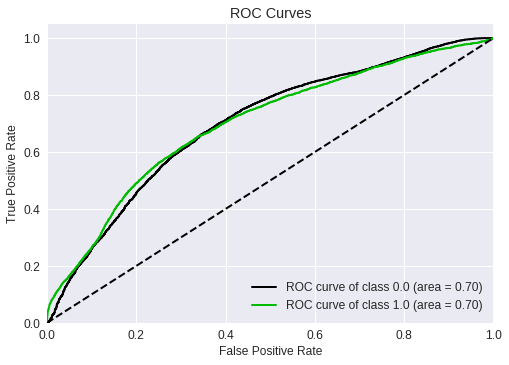

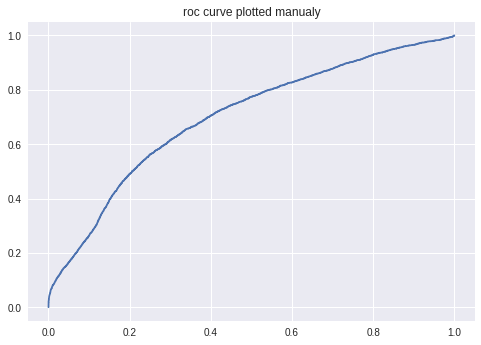

In [37]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
#from CLR import CyclicLR
### keras tools
from keras.models import model_from_json
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


## sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt

import scikitplot as skplt

import h5py
#################################################################################################################

# POSITIVE - TRAIN
print("version 7")


print("step_size = {}".format(step_size))
print('epochs {}, base_lr {}, max_lr {}, batch_size {}'.format(epochs, base_lr, max_lr, batch_size))
fpos = h5py.File('Positive_train.h5', 'r')
first_key=list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_train = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
train_pos=dposar.reshape([-1,size_image,size_image,1])

print("The positive patches for training are: ", num_pos_train)

# NEGATIVE - TRAIN
fneg = h5py.File('300kNegative_train.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_train = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
train_neg=dnegar.reshape([-1,size_image,size_image,1])

print("The egative patches for training are: ", num_neg_train)

   

# Create the target vectors
train_pos_lab = np.ones((actual_num_pos_train,1))
train_neg_lab = np.zeros((actual_num_neg_train,1))

#### Build the training set  (images and targets)
tpos = np.copy(train_pos[0:actual_num_pos_train,:,:,:])
tneg = np.copy(train_neg[0:actual_num_neg_train,:,:,:])

# Stack the subsets
X_Train = np.vstack((tpos,tneg))
Y_Train = np.vstack((train_pos_lab,train_neg_lab))

# Shuffle the two arrays in unison
X_Train, Y_Train = shuffle(X_Train,Y_Train)

#######################augmentation + 
#######################Normalization

### do data augmentation at the end before predicting

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=0,
    vertical_flip=False)
datagen.fit(X_Train)

#################################
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv1', input_shape = X_Train.shape[1:]))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv1'))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(Flatten())

model.add(Dense(units = 256, activation='relu', name='fc1'))
model.add(Dropout(rate=0.5))

model.add(Dense(units = 256, activation='relu', name='fc2'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=2, activation='softmax', name='predictions'))


Y_one_hot = to_categorical(np.ravel(Y_Train),2)

#### fixed lr part
gradientDescent = SGD(lr=lr_fixed, decay=0.96)
model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])
model.fit_generator(datagen.flow(x= X_Train, y =Y_one_hot,batch_size = batch_size),steps_per_epoch=len(X_Train) / batch_size,
                     verbose=2,epochs=epochs, use_multiprocessing=True)
                    


#####################################################
#################NORMALIATION########################
normalized_Xtrain = datagen.standardize(X_Train)
####################################################
####################################################
y_pred_keras = model.predict_proba(normalized_Xtrain, verbose=2, batch_size=batch_size)
fpr_keras, tpr_keras, _ = roc_curve(Y_Train, y_pred_keras[:,1])
train_auc = roc_auc_score(Y_Train, y_pred_keras[:,1])
print("AUC: {}".format(train_auc))

skplt.metrics.plot_roc(Y_Train, y_pred_keras, plot_micro=False, plot_macro=False)
plt.figure()
plt.plot(fpr_keras, tpr_keras)
plt.title('roc curve plotted manualy')
plt.show

test = y_pred_keras[y_pred_keras[:,1]!=0, 1]
test.__len__()

############################### #serialize model to JSON and weights to HDF5
if save == True:
    model_json = model.to_json()
    with open(model_name, 'w') as json_file:
        json_file.write(model_json)

    model.save_weights(weights_name)
    joblib.dump(datagen,normalizer_name)

    print("model and weights have been saved")

###############################

Test

## Test

The positive patches for testing are:  1164
The negative patches for testing are:  110000
model loaded
111164/111164 [==============================] - 14s 123us/step
The Scored loss is 0.6873659068595028, accuracy0.7924238062617821
AUC: 0.7690 PRECISION:  0.0309 RECALL: 0.6194 F1SCORE: 0.0588 


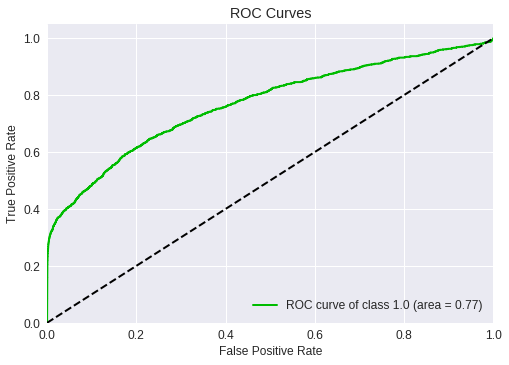

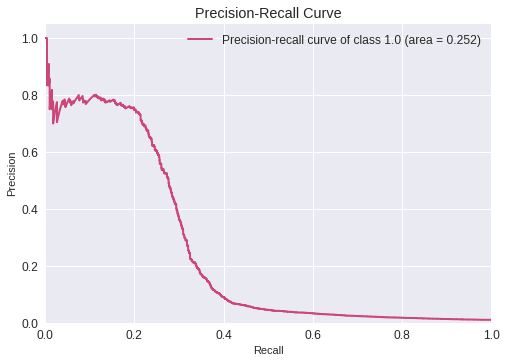

In [38]:
from __future__ import print_function

import numpy as np

from keras.models import model_from_json
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
#from sklearn.metrics import roc_auc_score

#from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import h5py


#################################################################################################################
# POSITIVE - Test
fpos = h5py.File('Positive_test.h5', 'r')
first_key = list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_test = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
test_pos=dposar.reshape([-1,size_image,size_image,1])

print("The positive patches for testing are: ", num_pos_test)

# NEGATIVE - Test
fneg = h5py.File('300kNegative_test.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_test = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
test_neg=dnegar.reshape([-1,size_image,size_image,1])

print("The negative patches for testing are: ", num_neg_test)

# the sum of positive and negative test set ~= 20% od training set size
actual_num_pos_test = 1164
actual_num_neg_test = 110000

# Create the target vectors
test_pos_lab = np.ones((actual_num_pos_test,1))
test_neg_lab = np.zeros((actual_num_neg_test,1))

#### Build the training set  (images and targets)
tpos = np.copy(test_pos[0:actual_num_pos_test,:,:,:])
tneg = np.copy(test_neg[0:actual_num_neg_test,:,:,:])

# Stack the subsets
X_Test = np.vstack((tpos,tneg))
Y_Test = np.vstack((test_pos_lab,test_neg_lab))

json_file = open(model_name, 'r')
loaded_json_model = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_json_model)
loaded_model.load_weights(weights_name)

print("model loaded")
gradientDescent = SGD(lr= lr_fixed, decay=0.96)
loaded_model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

####### Loading NORMALIZER #######
########                 ################################
normalizer  = joblib.load(normalizer_name)
normalized_Xtest = normalizer.standardize(X_Test)

predictions = loaded_model.predict_proba(normalized_Xtest)
Y_one_hot = to_categorical(np.ravel(Y_Test),2)
score = loaded_model.evaluate(x=X_Test,y= Y_one_hot)
print("The Scored loss is {}, accuracy{}".format(score[0], score[1]))

# print('accuracy ={}'.format(np.mean(np.argmax(predictions,1)==Y_Test)))
# print('accuracy ={}'.format(accuracy_score(Y_Test, np.argmax(predictions,1))))

fpr_keras, tpr_keras, _ = roc_curve(Y_Test, predictions[:,1])

test_auc = roc_auc_score(Y_Test, predictions[:,1])

test_precision, test_recall, test_f1score, _ = precision_recall_fscore_support(Y_Test, np.argmax(predictions, axis=1),average = 'binary')

print("AUC: %.4f PRECISION:  %.4f RECALL: %.4f F1SCORE: %.4f " %(test_auc,test_precision, test_recall, test_f1score))

skplt.metrics.plot_roc(Y_Test, predictions ,plot_micro=False, plot_macro=False, classes_to_plot=1)
skplt.metrics.plot_precision_recall(Y_Test, predictions ,plot_micro=False, classes_to_plot=1, cmap='plasma')

